<a href="https://colab.research.google.com/github/jcj217-mc/Data_205_Final_Project/blob/main/Data205Project_IA_Discrimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [ ]:
# .json file data imported as pandas data frame
df = pd.read_json('https://data.montgomerycountymd.gov/resource/tkbe-6sx5.json')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filenum          90 non-null     object
 1   created_dt       90 non-null     object
 2   source           90 non-null     object
 3   allegation       90 non-null     object
 4   incident_status  90 non-null     object
 5   finding          78 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [ ]:
df.describe()

,filenum,created_dt,source,allegation,incident_status,finding
count,90,90,90,90,90,78
unique,88,74,2,2,2,8
top,15-0195,2020-12-14T00:00:00.000,External,Discrimination/Harassment,Completed,Declined
freq,2,4,48,53,78,23


In [ ]:
df.head()

,filenum,created_dt,source,allegation,incident_status,finding
0,13-0263,2013-09-24T00:00:00.000,External,Discrimination/Harassment,Completed,Unfounded
1,13-0303,2013-11-07T00:00:00.000,Internal,Discrim/Race/Sex,Completed,Unfounded
2,14-0058,2014-03-27T00:00:00.000,Internal,Discrimination/Harassment,Completed,Administrative Closure
3,14-0077,2014-04-22T00:00:00.000,Internal,Discrimination/Harassment,Completed,Administrative Closure
4,14-0077,2014-04-22T00:00:00.000,Internal,Discrimination/Harassment,Completed,Sustained


In [ ]:
df.allegation.unique()

array(['Discrimination/Harassment', 'Discrim/Race/Sex'], dtype=object)

In [ ]:
df.finding.unique()

array(['Unfounded', 'Administrative Closure', 'Sustained', 'Exonerated',
       'Corrective Action Taken', 'No Corrective Action Tak',
       'Insufficent Evidence', 'Declined', nan], dtype=object)

In [ ]:
# Changing Date to datetime
df.created_dt = pd.to_datetime(df.created_dt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   filenum          90 non-null     object        
 1   created_dt       90 non-null     datetime64[ns]
 2   source           90 non-null     object        
 3   allegation       90 non-null     object        
 4   incident_status  90 non-null     object        
 5   finding          78 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.3+ KB


In [ ]:
# add a column for Year
df['Year'] = df['created_dt'].dt.year
df.head(1)

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,13-0263,2013-09-24,External,Discrimination/Harassment,Completed,Unfounded,2013


In [ ]:
df.Year.min()

2013

In [ ]:
df.Year.max()

2021

In [ ]:
df_allegation = df.loc[:,['allegation','Year']]
df_allegation

,allegation,Year
0,Discrimination/Harassment,2013
1,Discrim/Race/Sex,2013
2,Discrimination/Harassment,2014
3,Discrimination/Harassment,2014
4,Discrimination/Harassment,2014
...,...,...
85,Discrim/Race/Sex,2021
86,Discrimination/Harassment,2021
87,Discrim/Race/Sex,2021
88,Discrimination/Harassment,2021


In [ ]:
df_allegation.allegation.value_counts()

Discrimination/Harassment    53
Discrim/Race/Sex             37
Name: allegation, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [ ]:
harass_df = pd.DataFrame(df[(df['allegation']=="Discrimination/Harassment")])
harass_df.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,13-0263,2013-09-24,External,Discrimination/Harassment,Completed,Unfounded,2013
2,14-0058,2014-03-27,Internal,Discrimination/Harassment,Completed,Administrative Closure,2014
3,14-0077,2014-04-22,Internal,Discrimination/Harassment,Completed,Administrative Closure,2014
4,14-0077,2014-04-22,Internal,Discrimination/Harassment,Completed,Sustained,2014
6,14-0157,2014-07-21,External,Discrimination/Harassment,Completed,Corrective Action Taken,2014


In [ ]:
df_harass_internal = df[(df["allegation"] == 'Discrimination/Harassment') & (df["source"] == 'Internal')]
df_harass_internal.value_counts

<bound method DataFrame.value_counts of     filenum created_dt  ...                   finding  Year
2   14-0058 2014-03-27  ...    Administrative Closure  2014
3   14-0077 2014-04-22  ...    Administrative Closure  2014
4   14-0077 2014-04-22  ...                 Sustained  2014
8   15-0010 2015-01-23  ...                 Sustained  2015
13  15-0193 2015-10-26  ...  No Corrective Action Tak  2015
14  15-0195 2015-10-26  ...                Exonerated  2015
15  15-0195 2015-10-26  ...      Insufficent Evidence  2015
16  15-0216 2015-12-03  ...                 Unfounded  2015
17  15-0225 2015-12-17  ...                 Sustained  2015
18  16-0016 2016-01-27  ...                 Sustained  2016
21  16-0072 2016-04-11  ...  No Corrective Action Tak  2016
22  16-0111 2016-05-23  ...      Insufficent Evidence  2016
27  16-0321 2017-01-05  ...    Administrative Closure  2017
28  17-0030 2017-02-06  ...      Insufficent Evidence  2017
29  17-0034 2017-02-06  ...    Administrative Closure  2017


In [ ]:
df_harass_external = df[(df["allegation"] == 'Discrimination/Harassment') & (df["source"] == 'External')]
df_harass_external.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
0,13-0263,2013-09-24,External,Discrimination/Harassment,Completed,Unfounded,2013
6,14-0157,2014-07-21,External,Discrimination/Harassment,Completed,Corrective Action Taken,2014
9,15-0016,2015-02-10,External,Discrimination/Harassment,Completed,Exonerated,2015
10,15-0026,2015-03-04,External,Discrimination/Harassment,Completed,No Corrective Action Tak,2015
11,15-0094,2015-05-27,External,Discrimination/Harassment,Completed,Insufficent Evidence,2015


In [ ]:
df_harass_external.finding.value_counts

<bound method IndexOpsMixin.value_counts of 0                    Unfounded
6      Corrective Action Taken
9                   Exonerated
10    No Corrective Action Tak
11        Insufficent Evidence
12    No Corrective Action Tak
24      Administrative Closure
25                    Declined
32    No Corrective Action Tak
34        Insufficent Evidence
35                    Declined
37      Administrative Closure
48    No Corrective Action Tak
57                    Declined
59                         NaN
60                   Unfounded
62                    Declined
63                    Declined
66                   Sustained
70                    Declined
75                         NaN
77                         NaN
86                    Declined
Name: finding, dtype: object>

In [ ]:
df_harass_external_corrective = df[(df["allegation"] == 'Discrimination/Harassment')

In [ ]:
df_harass_external_corrective = df[(df["finding"] == 'Corrective Action Taken') & (df["source"] == 'External')]
df_harass_external_corrective.head()

,filenum,created_dt,source,allegation,incident_status,finding,Year
6,14-0157,2014-07-21,External,Discrimination/Harassment,Completed,Corrective Action Taken,2014


In [ ]:
df_harass_internal_corrective = df[(df["finding"] == 'Corrective Action Taken')]
df_harass_internal_corrective.value_counts

<bound method DataFrame.value_counts of     filenum created_dt    source  ... incident_status                  finding  Year
6   14-0157 2014-07-21  External  ...       Completed  Corrective Action Taken  2014
33  17-0085 2017-04-12  Internal  ...       Completed  Corrective Action Taken  2017

[2 rows x 7 columns]>

In [ ]:
Race_Sex_df = pd.DataFrame(df[(df['allegation']=="Discrim/Race/Sex")])

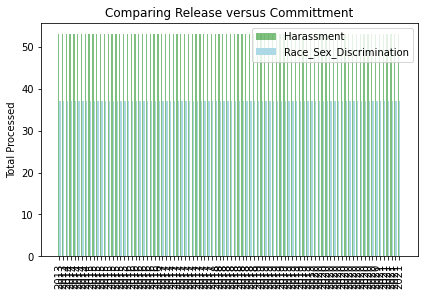

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = df.Year
Harass = harass_df.allegation.count()
Race_Sex = Race_Sex_df.allegation.count()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Harass, width, label='Harassment',color='green', alpha = 0.5)
rects2= ax.bar(x + width/2, Race_Sex, width, label='Race_Sex_Discrimination', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Processed')
ax.set_title('Comparing Release versus Committment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

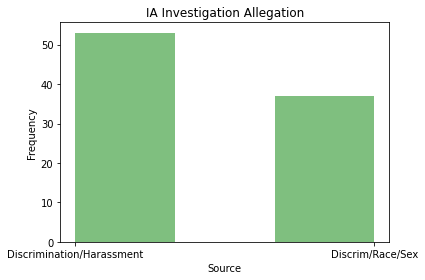

In [ ]:
plt.hist(df.allegation, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Allegation')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

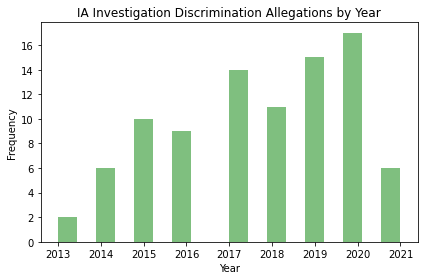

In [ ]:
plt.hist(df.Year, facecolor='green', color = 'black', alpha=0.5, bins = 18 )
plt.title('IA Investigation Discrimination Allegations by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('IA_discrim_year.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
df_harassfinding = df.finding.value_counts()
df_harassfinding

Declined                    23
Administrative Closure      12
No Corrective Action Tak    10
Unfounded                   10
Insufficent Evidence         8
Sustained                    8
Exonerated                   5
Corrective Action Taken      2
Name: finding, dtype: int64

In [ ]:
# Successfully creating excel sheet with cell output
df_harassfinding.to_excel("./harassfindingdf.xlsx")

In [ ]:
df_harassfinding = pd.read_csv('harassfindingdf.csv')

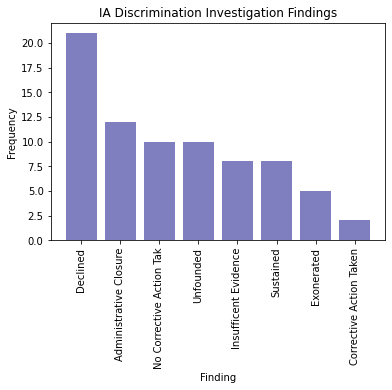

In [ ]:
plt.bar(df_harassfinding.Finding, df_harassfinding.Count, facecolor='navy', alpha=0.5, )
plt.title('IA Discrimination Investigation Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.savefig('Discrim_findings.png', dpi=300, bbox_inches = 'tight')

plt.show()

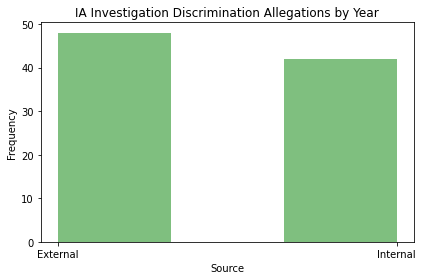

In [ ]:
plt.hist(df.source, facecolor='green', color = 'black', alpha=0.5, bins = 3 )
plt.title('IA Investigation Discrimination Allegations by Year')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.source.value_counts()

External    48
Internal    42
Name: source, dtype: int64

In [ ]:
47+42

89

In [ ]:
47/89 *100

52.80898876404494

In [ ]:
42/89 *100

47.19101123595505